In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [16]:
df = pd.read_excel('../input/Bank_Personal_Loan_Modelling.xlsx','Data')

In [17]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

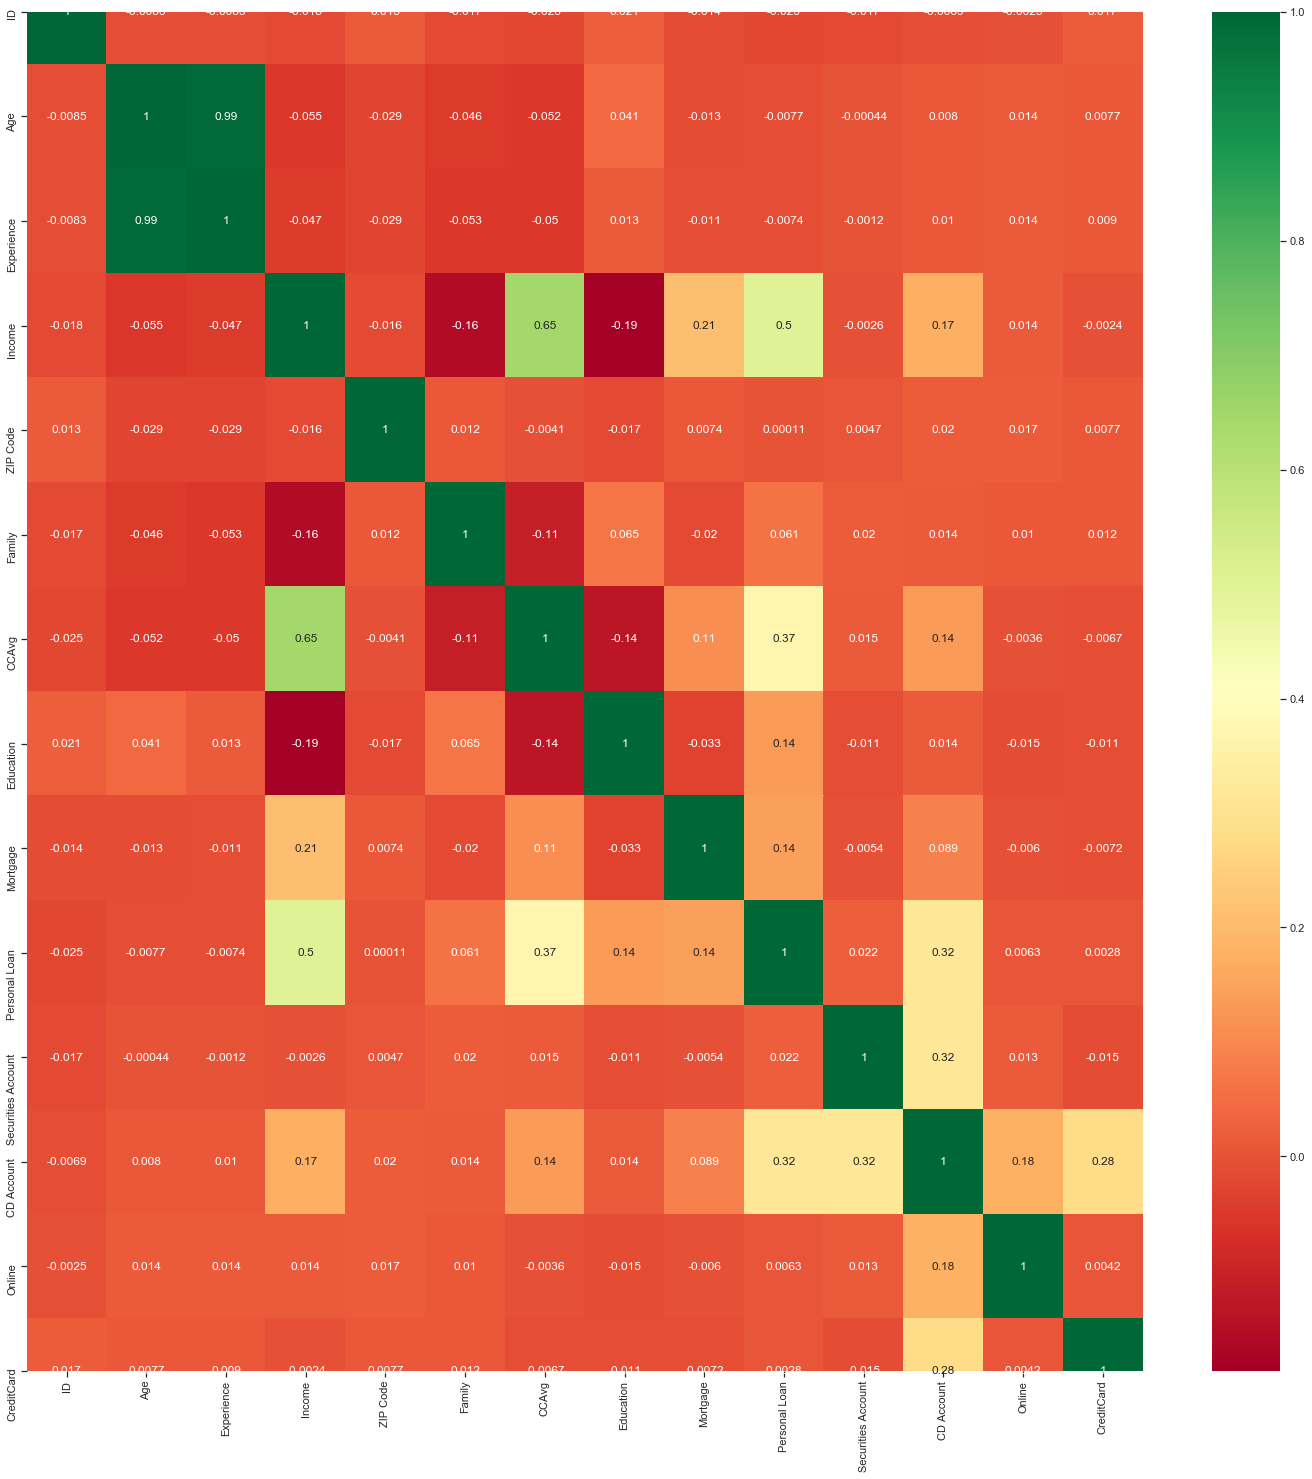

In [20]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


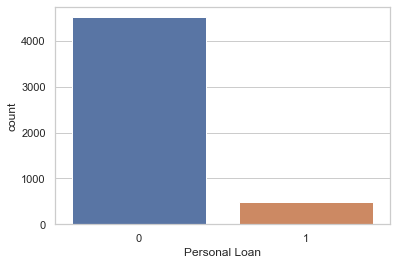

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000013DFF19348>,
      dtype=object)

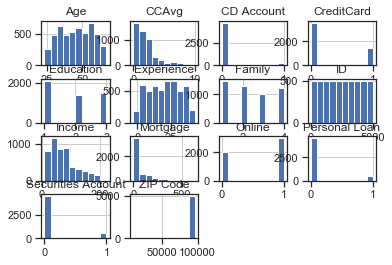

In [21]:
#df.drop(df,columns=['Online','Zip',])

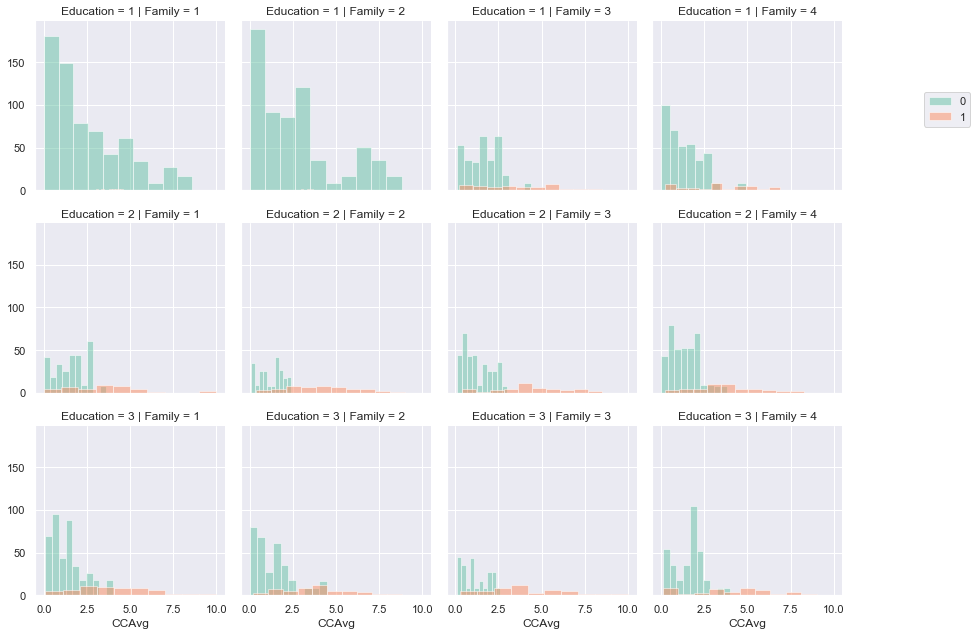

In [27]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df,row='Education',col='Family',hue='Personal Loan',palette='Set2')
g=g.map(plt.hist, 'CCAvg', alpha=0.5)
plt.legend(bbox_to_anchor=(1.7,3))

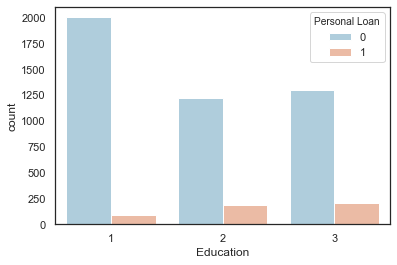

In [28]:
sns.set_style('white')
sns.countplot(data=df,x='Education',hue='Personal Loan',palette='RdBu_r')

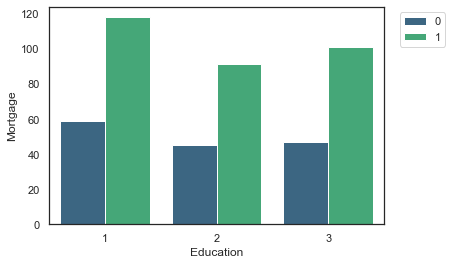

In [29]:
sns.barplot('Education','Mortgage',hue='Personal Loan',data=df,palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.2,1))

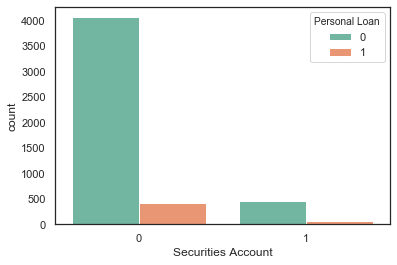

In [30]:
sns.set_style('white')
sns.countplot(data=df,x='Securities Account',hue='Personal Loan',palette='Set2')

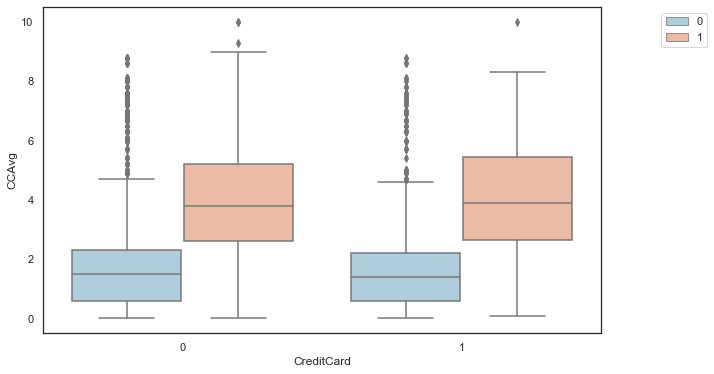

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot('CreditCard','CCAvg',hue='Personal Loan',data=df,palette='RdBu_r')
plt.legend(bbox_to_anchor=(1.2,1))

In [32]:
X=pd.DataFrame(columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','CreditCard','Online'],data=df)

In [33]:
y=df['Personal Loan']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree= DecisionTreeClassifier(max_leaf_nodes=3)

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
predictions= dtree.predict(X_test)

In [50]:
dtree.score(X_train , y_train)

0.9664

In [51]:
dtree.score(X_test , y_test)

0.9648

In [53]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
randomforest_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
randomforest_model.score(X_test , y_test)

0.9304